In [2]:
import pandas as pd
import matplotlib

%matplotlib inline

recent_grads=pd.read_csv('recent-grads.csv')
#Exploring the data
print(recent_grads.iloc[1])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

#Drop missing values
raw_data_count=len(recent_grads.index)
print(raw_data_count)
recent_grads.dropna(inplace=True)
cleaned_data_count=len(recent_grads.index)
print(cleaned_data_count)


Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

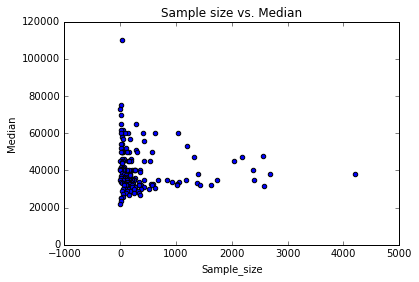

In [3]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size vs. Median')

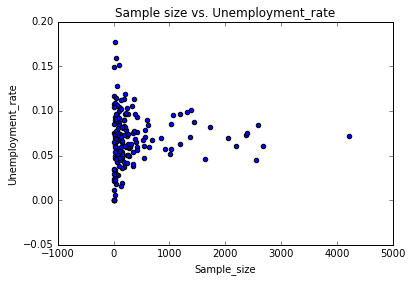

In [4]:
ax2=recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample size vs. Unemployment_rate')

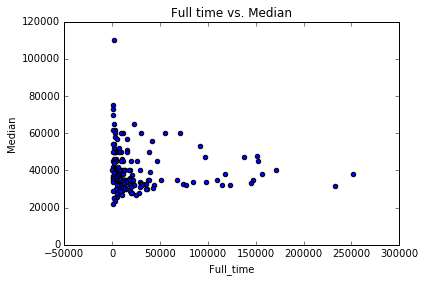

In [5]:
ax3=recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full time vs. Median')

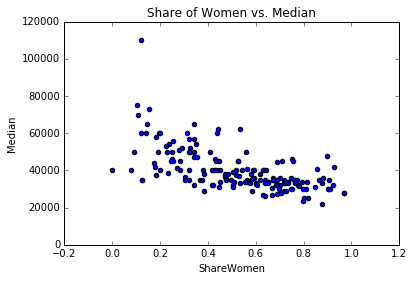

In [6]:
ax4=recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax4.set_title('Share of Women vs. Median')

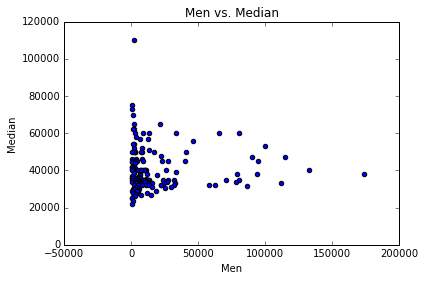

In [7]:
ax5=recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs. Median')

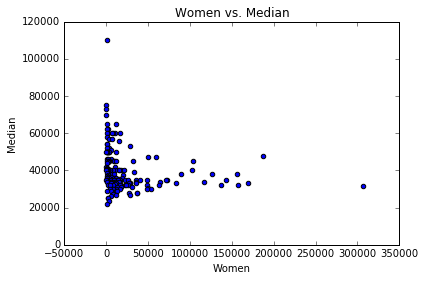

In [8]:
ax6=recent_grads.plot(x='Women', y='Median', kind='scatter')
ax6.set_title('Women vs. Median')

In [9]:
'''It looks like the popularity of the major has little to do with the amount of money that major makes. 
There's a weak negative correlation between the share of women in a major and the money earned.
There doesn't appear to be any correlation between the number of full time employees and median salary.'''

"It looks like the popularity of the major has little to do with the amount of money that major makes. \nThere's a weak negative correlation between the share of women in a major and the money earned.\nThere doesn't appear to be any correlation between the number of full time employees and median salary."

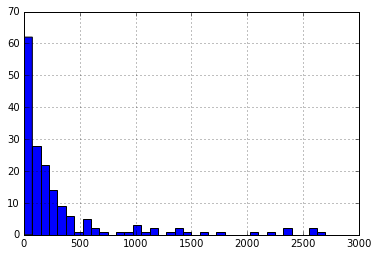

In [10]:
ax7=recent_grads['Sample_size'].hist(bins=40, range=(0,3000))

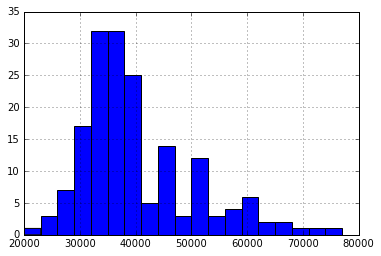

In [11]:
ax8=recent_grads['Median'].hist(bins=20, range=(20000,80000))

In [12]:
'''For recent graduates, the most common salary range is between 30000 and 50000 dollars. That's unfortunate.'''

"For recent graduates, the most common salary range is between 30000 and 50000 dollars. That's unfortunate."

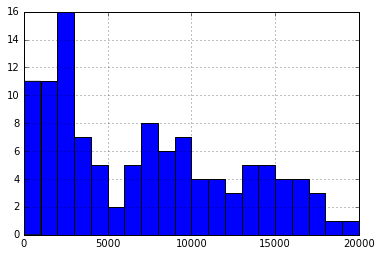

In [13]:
ax9=recent_grads['Employed'].hist(bins=20, range=(0,20000))

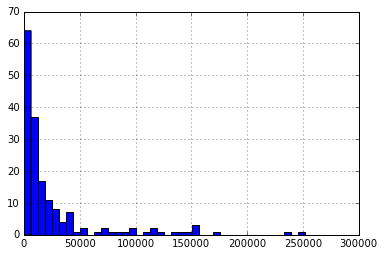

In [14]:
ax10=recent_grads['Full_time'].hist(bins=40)

In [15]:
'''For the above histogram, there are many majors with only a few students in them, so they will 
necessarily have few full-time positions, which produces a very uneven graph. The larger majors will have more full-time students, but there are only a few of those majors compared
to the many majors with few students. Also, the graph shows that there is a gap between
the largest majors, the medium majors and finally gradations of the smaller majors.'''

'For the above histogram, there are many majors with only a few students in them, so they will \nnecessarily have few full-time positions, which produces a very uneven graph. The larger majors will have more full-time students, but there are only a few of those majors compared\nto the many majors with few students. Also, the graph shows that there is a gap between\nthe largest majors, the medium majors and finally gradations of the smaller majors.'

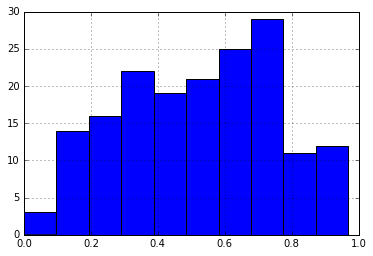

In [16]:
ax11=recent_grads['ShareWomen'].hist()

In [17]:
'''This graph shows that about thirty percent of all majors have shares of women above 70%. That can be determined by taking the approximate count in the 0.7-1.0 bins, totaling it, and dividing it by the total number of majors, 172, which we got earlier by len(cleaned_data_count). '''

'This graph shows that about thirty percent of all majors have shares of women above 70%. That can be determined by taking the approximate count in the 0.7-1.0 bins, totaling it, and dividing it by the total number of majors, 172, which we got earlier by len(cleaned_data_count). '

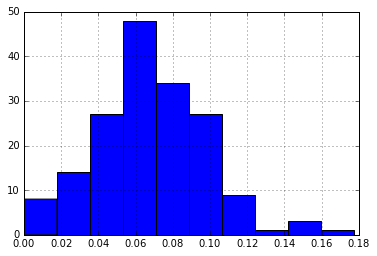

In [18]:
ax12=recent_grads['Unemployment_rate'].hist()

In [19]:
'''Based on a cursory look at the histogram, we see that the data cluster around 7%, which is slightly lower than the rough average unemployment rate from 2010 to 2012, 8.5%. There are very few majors with unemployment rates higher than 10%. '''

'Based on a cursory look at the histogram, we see that the data cluster around 7%, which is slightly lower than the rough average unemployment rate from 2010 to 2012, 8.5%. There are very few majors with unemployment rates higher than 10%. '

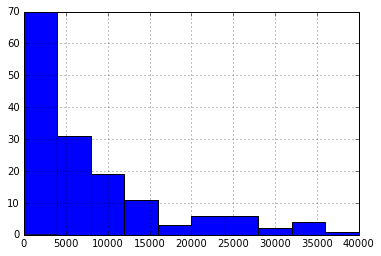

In [20]:
ax12=recent_grads['Men'].hist(range=(0,40000))

In [21]:
'''Not a very useful histogram. Again, many majors have low student counts in total, so the number of men will be small. '''

'Not a very useful histogram. Again, many majors have low student counts in total, so the number of men will be small. '

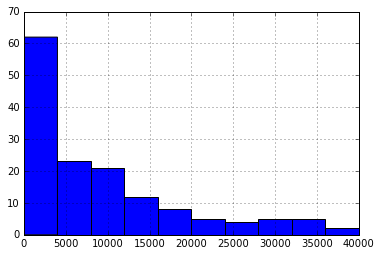

In [22]:
ax12=recent_grads['Women'].hist(range=(0,40000))

In [23]:
'''This graph reveals that there are slightly fewer majors with small numbers of women in them compared to men. Interesting.'''

'This graph reveals that there are slightly fewer majors with small numbers of women in them compared to men. Interesting.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4ac3aa860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff473445cf8>]], dtype=object)

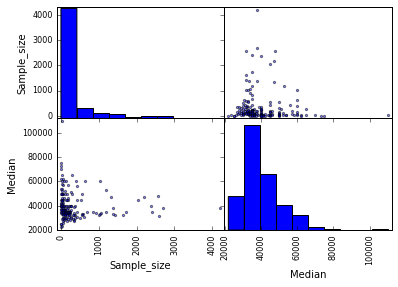

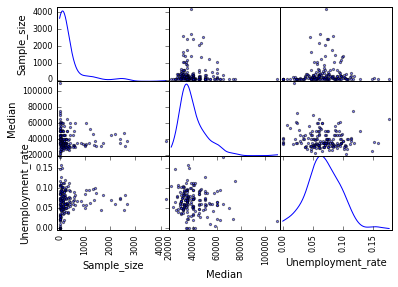

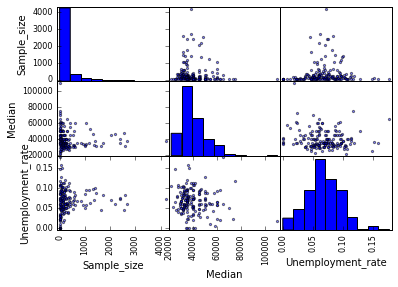

In [24]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']])
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], diagonal='kde')
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], diagonal='hist')

In [25]:
'''We can see, again, that most median earnings are clustered around 30,000, but with the scatter plot, we can see that there are a few individual majors with of large sizes that have earnings ranging in the 40-60k range. '''

'We can see, again, that most median earnings are clustered around 30,000, but with the scatter plot, we can see that there are a few individual majors with of large sizes that have earnings ranging in the 40-60k range. '

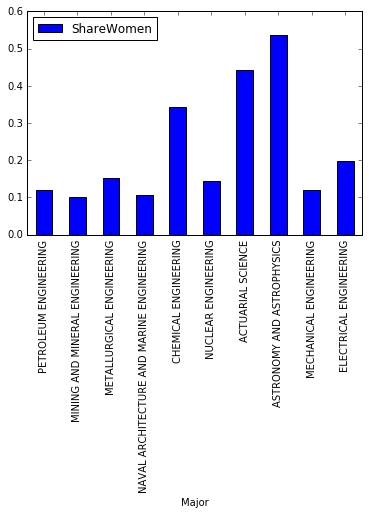

In [26]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')


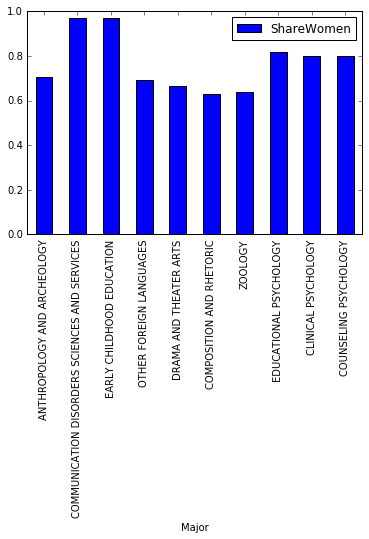

In [27]:
recent_grads[cleaned_data_count-11:cleaned_data_count-1].plot.bar(x='Major', y='ShareWomen')


In [28]:
'''The lowest paying majors have very high proportions of women in them.'''

'The lowest paying majors have very high proportions of women in them.'

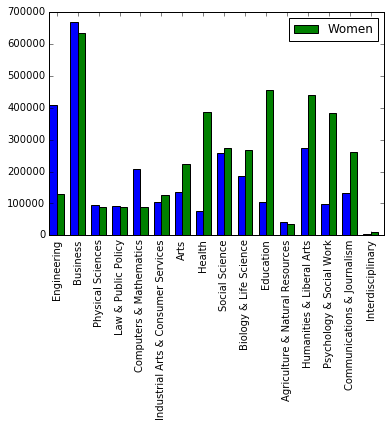

In [29]:
#Matplotlib implementation of men/women split by major category
import numpy as np
unique_major_categories=recent_grads['Major_category'].unique()
major_series_men=[]
major_series_women=[]
for cat in unique_major_categories: 
    data=recent_grads[recent_grads['Major_category']==cat]
    men=data['Men'].sum()
    major_series_men.append(men)
    women=data['Women'].sum()
    major_series_women.append(women)
bar_width=0.35
matplotlib.pyplot.bar(np.arange(len(unique_major_categories)),major_series_men, bar_width)
matplotlib.pyplot.bar(bar_width+np.arange(len(unique_major_categories)),major_series_women, bar_width,color='g', label="Women")
matplotlib.pyplot.xticks(bar_width+np.arange(len(unique_major_categories)),unique_major_categories, rotation=90)
matplotlib.pyplot.legend()


                       Major categories       Men     Women
0                           Engineering  408307.0  129276.0
1                              Business  667852.0  634524.0
2                     Physical Sciences   95390.0   90089.0
3                   Law & Public Policy   91129.0   87978.0
4               Computers & Mathematics  208725.0   90283.0
5   Industrial Arts & Consumer Services  103781.0  126011.0
6                                  Arts  134390.0  222740.0
7                                Health   75517.0  387713.0
8                        Social Science  256834.0  273132.0
9                Biology & Life Science  184919.0  268943.0
10                            Education  103526.0  455603.0
11      Agriculture & Natural Resources   40357.0   35263.0
12            Humanities & Liberal Arts  272846.0  440622.0
13             Psychology & Social Work   98115.0  382892.0
14          Communications & Journalism  131921.0  260680.0
15                    Interdisciplinary 

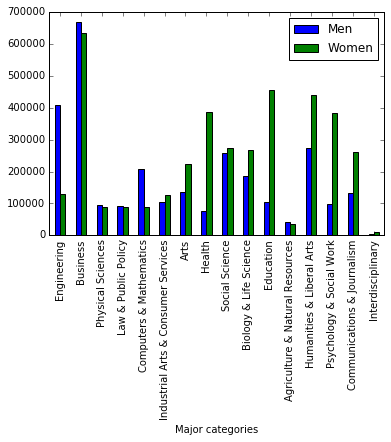

In [30]:
#pandas implementation of men/women split by major category
series_list=[]
for cat in unique_major_categories: 
    data=recent_grads[recent_grads['Major_category']==cat]
    men=data['Men'].sum()
    women=data['Women'].sum()
    cat=pd.Series([men,women], index=['Men', 'Women'])
    series_list.append(cat)
cat_df=pd.DataFrame(series_list, columns=['Men', 'Women'])
cat_df['Major categories']=unique_major_categories
cat_df=cat_df[['Major categories', 'Men', 'Women']]
print(cat_df)
cat_df.plot.bar(x='Major categories', y=['Men', 'Women'])

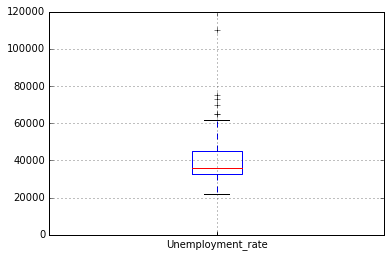

In [65]:
plt=recent_grads.boxplot('Median')
plt=recent_grads.boxplot('Unemployment_rate')

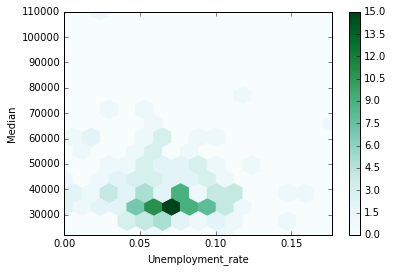

In [46]:
#Hexbin plot of Unemployment rate vs. Median
recent_grads.plot.hexbin(x='Unemployment_rate', sharex=False, y='Median', gridsize=15)